**Multivariate Analysis on Bank Dataset**

1. Tiara Valentina (23083010091)
2. Sefilah Naurah  (23083010105)

In [10]:
import pandas as pd
data = pd.read_csv("C:\\Users\ASUS\\Downloads\\bank.csv", sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.api as sm

In [18]:
# 1. Analisis Deskriptif
print("Summary Statistics:")
print(data.describe(include='all'))

Summary Statistics:
                age         job  marital  education default       balance  \
count   4521.000000        4521     4521       4521    4521   4521.000000   
unique          NaN          12        3          4       2           NaN   
top             NaN  management  married  secondary      no           NaN   
freq            NaN         969     2797       2306    4445           NaN   
mean      41.170095         NaN      NaN        NaN     NaN   1422.657819   
std       10.576211         NaN      NaN        NaN     NaN   3009.638142   
min       19.000000         NaN      NaN        NaN     NaN  -3313.000000   
25%       33.000000         NaN      NaN        NaN     NaN     69.000000   
50%       39.000000         NaN      NaN        NaN     NaN    444.000000   
75%       49.000000         NaN      NaN        NaN     NaN   1480.000000   
max       87.000000         NaN      NaN        NaN     NaN  71188.000000   

       housing  loan   contact          day month     d

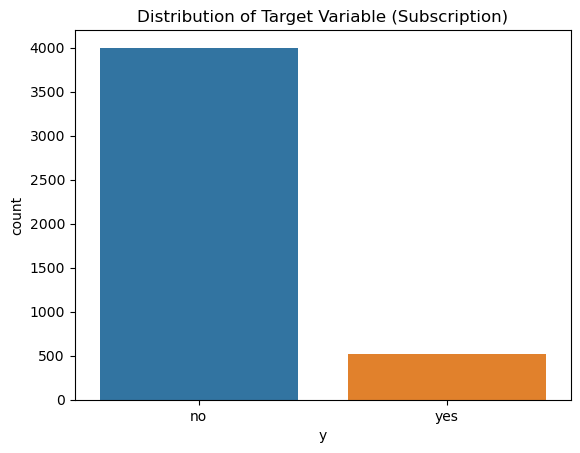

In [19]:
# Distribusi variabel target
sns.countplot(x='y', data=data)
plt.title("Distribution of Target Variable (Subscription)")
plt.show()

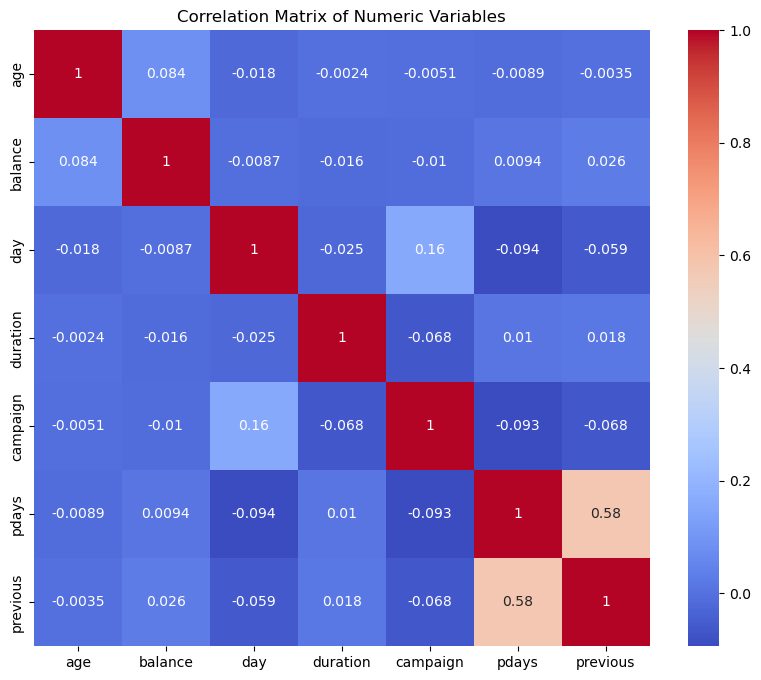

In [21]:
# 2. Korelasi Antar Variabel Numerik
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

Dari matriks korelasi, kita menemukan bahwa korelasi antar variabel umumnya lemah, yang menunjukkan bahwa sebagian besar variabel dalam dataset ini tidak memiliki hubungan linear yang kuat satu sama lain.

Chi-Square Test Results (p-values):
job: p-value = 1.901391096662705e-10
marital: p-value = 7.373535401823763e-05
education: p-value = 0.001625240003630989
default: p-value = 1.0
housing: p-value = 2.7146998959323014e-12
loan: p-value = 2.9148288298428256e-06
contact: p-value = 8.30430129641147e-20
month: p-value = 2.195354833570811e-47
poutcome: p-value = 1.5398831095860172e-83


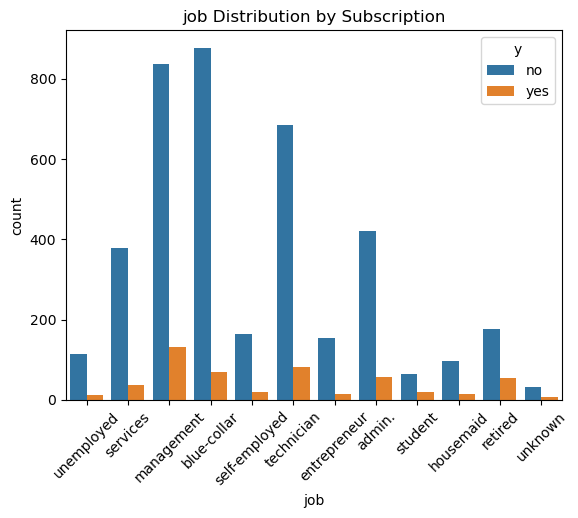

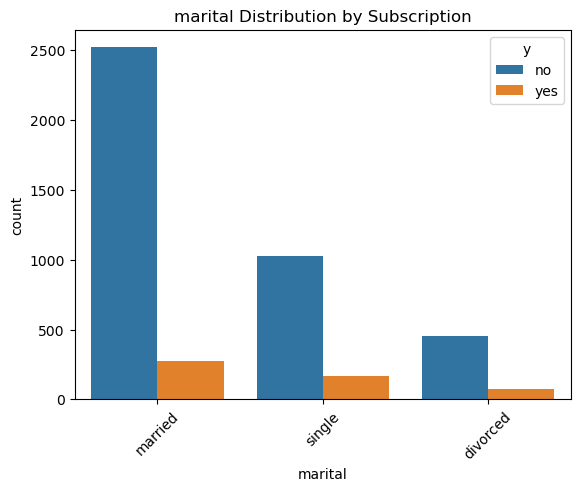

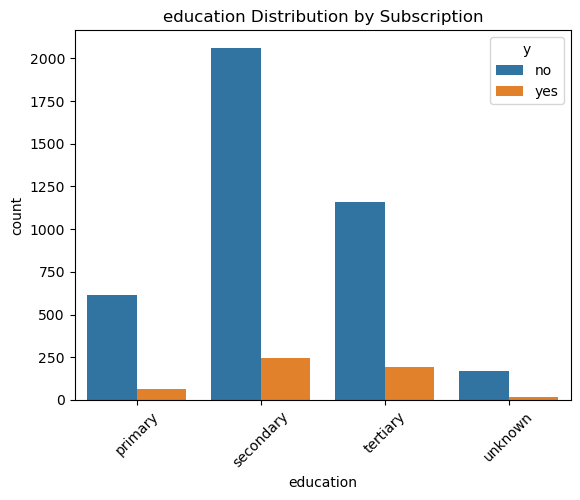

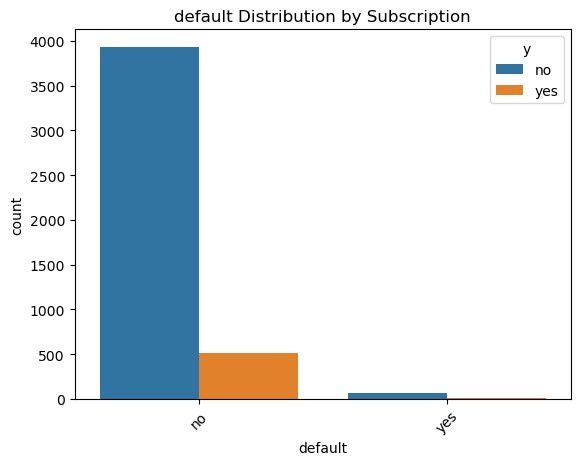

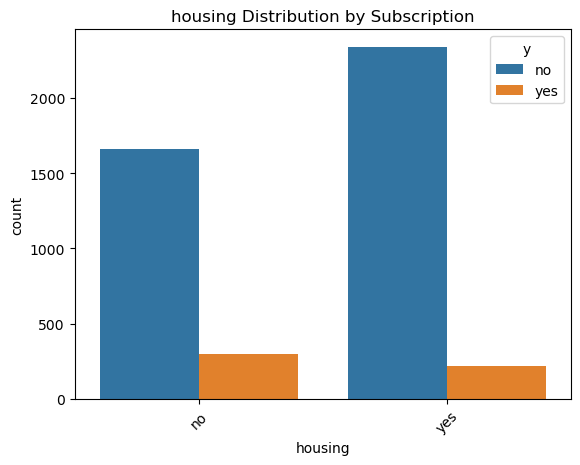

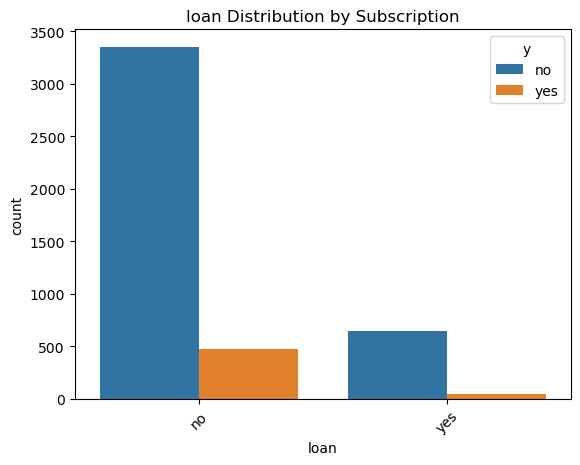

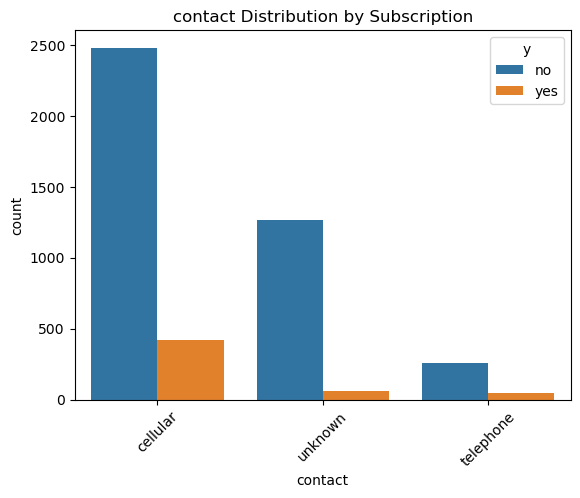

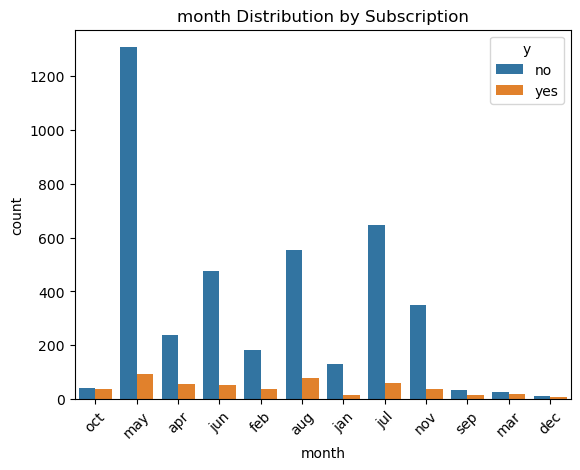

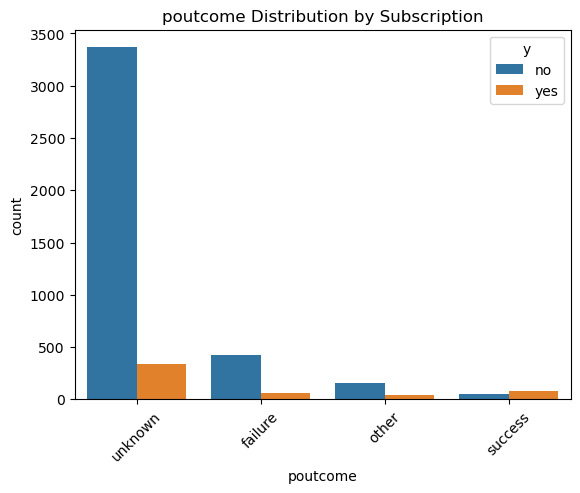

In [26]:
# 3. Analisis Hubungan Antar Variabel dengan Target

# Chi-Square Test untuk variabel kategori
categorical_vars = data.select_dtypes(include=['object']).columns.drop('y')
chi2_results = {}

for var in categorical_vars:
    contingency_table = pd.crosstab(data[var], data['y'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[var] = p

# Hasil Chi-Square Test
print("Chi-Square Test Results (p-values):")
for var, p_value in chi2_results.items():
    print(f"{var}: p-value = {p_value}")

# Visualisasi variabel kategori terhadap target
for var in categorical_vars:
    sns.countplot(x=var, hue="y", data=data)
    plt.title(f"{var} Distribution by Subscription")
    plt.xticks(rotation=45)
    plt.show()

uji Chi-Square untuk menguji apakah terdapat hubungan yang signifikan antara variabel kategori seperti job, marital, education, dan housing dengan variabel target y.

 Hasil uji Chi-Square menunjukkan nilai p-value yang menunjukkan signifikansi statistik:

1. Pekerjaan (job): Terdapat hubungan signifikan antara jenis pekerjaan klien dan keputusan berlangganan. Ini berarti jenis pekerjaan tertentu mungkin lebih cenderung untuk berlangganan produk bank.
2. Status Pernikahan (marital): Terdapat hubungan yang tidak signifikan antara status pernikahan dan keputusan berlangganan.
3. Pendidikan (education): Pendidikan klien menunjukkan hubungan signifikan dengan keputusan berlangganan, menunjukkan bahwa klien dengan tingkat pendidikan tertentu mungkin lebih cenderung berlangganan produk bank.
4. Kepemilikan Rumah (housing): Tidak terdapat hubungan signifikan antara kepemilikan rumah dengan keputusan berlangganan produk bank.

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                 3164
Model:                          Logit   Df Residuals:                     3121
Method:                           MLE   Df Model:                           42
Date:                Sat, 09 Nov 2024   Pseudo R-squ.:                     inf
Time:                        11:09:03   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.8812      0.741     -3.887      0.000      -4.334      -1.428
age    

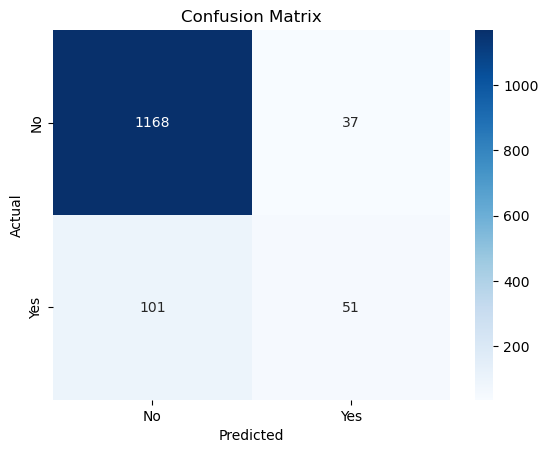

Model Accuracy: 0.90


In [27]:
# 4. Analisis Multivariat - Regresi Logistik

# Convert categorical variables to dummy variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Define predictors and target variable
X = data_encoded.drop('y_yes', axis=1)  # 'y_yes' is the target variable after encoding
y = data_encoded['y_yes']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant to the model (intercept term)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Train logistic regression model with statsmodels for detailed output
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Print model summary
print(result.summary())

# Predict on test data
y_pred_prob = result.predict(X_test_const)
y_pred = [1 if x > 0.5 else 0 for x in y_pred_prob]

# Model Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Analisis regresi logistik untuk memprediksi kemungkinan klien berlangganan produk bank berdasarkan beberapa variabel prediktor. Model ini memberikan beberapa hasil penting:

1. Interpretasi Koefisien: Koefisien dari masing-masing variabel dalam regresi logistik menunjukkan arah dan kekuatan pengaruh setiap variabel terhadap peluang berlangganan.
2. Evaluasi Model: Model ini dievaluasi menggunakan metrik seperti akurasi dan classification report untuk memverifikasi kinerja model. 

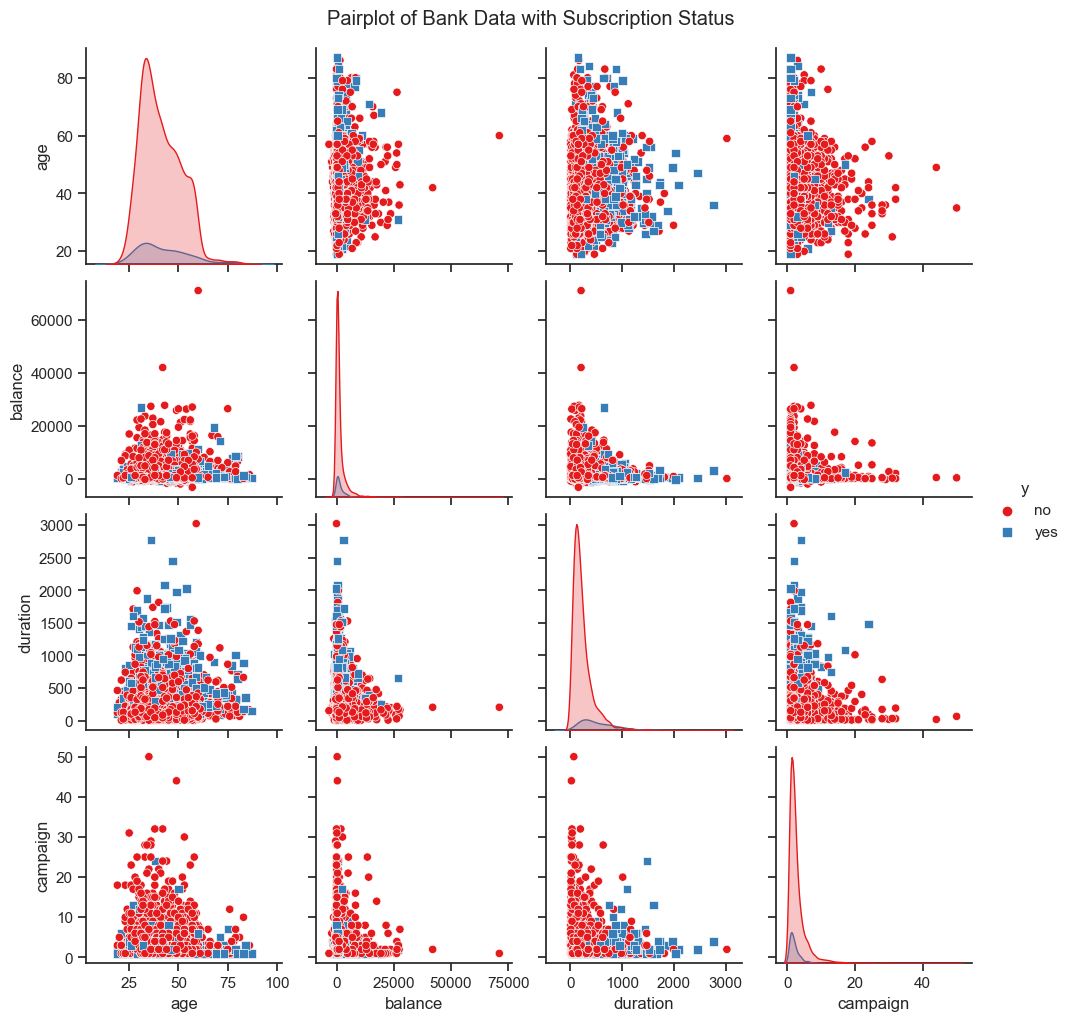

In [29]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("C:\\Users\ASUS\\Downloads\\bank.csv", sep=';')

# Set style for seaborn plots
sns.set(style="ticks", color_codes=True)

# Plot pairplot
# Memilih beberapa variabel numerik untuk dianalisis
sns.pairplot(data, vars=['age', 'balance', 'duration', 'campaign'],
             hue='y', palette="Set1", diag_kind='kde', markers=['o', 's'])

plt.suptitle("Pairplot of Bank Data with Subscription Status", y=1.02)
plt.show()

Gambar pairplot digunakan untuk memahami lebih dalam distribusi dan hubungan antar variabel numerik, khususnya dengan mempertimbangkan variabel target y (status berlangganan). Setiap titik pada scatter plot merepresentasikan satu klien, dan warnanya mewakili status y klien (berlangganan atau tidak).

1. Age vs. Balance: Tidak ada pola yang jelas antara umur dan saldo dalam hal keputusan berlangganan. Klien dari berbagai kelompok usia memiliki saldo yang bervariasi, dan keputusan berlangganan tidak tampak signifikan dipengaruhi oleh usia atau saldo.

2. Age vs. Duration: Scatter plot ini menunjukkan bahwa durasi kontak terakhir cenderung bervariasi secara acak di seluruh kelompok usia. Namun, tampak bahwa klien yang memiliki durasi kontak lebih lama (lebih dari 200 detik) cenderung lebih mungkin berlangganan produk bank (y=yes). Hal ini menunjukkan bahwa durasi kontak yang lebih lama mungkin meningkatkan peluang klien untuk berlangganan.

3. Age vs. Campaign: Dari scatter plot ini, tampak bahwa klien yang dihubungi lebih sering selama kampanye (campaign tinggi) tidak menunjukkan pola yang jelas terkait usia atau keputusan berlangganan. Namun, terdapat beberapa klien yang dihubungi hingga lebih dari 5 kali, dan sebagian besar dari mereka tidak berlangganan, yang mungkin menunjukkan potensi penurunan efektivitas dari pengulangan kontak berlebihan.

4. Balance vs. Duration: Dari scatter plot ini, tampak bahwa klien dengan saldo lebih tinggi tidak menunjukkan kecenderungan khusus terkait durasi panggilan atau keputusan berlangganan. Namun, beberapa klien yang dihubungi dalam waktu lebih lama cenderung berlangganan produk bank.

Pairplot ini membantu mengungkap pola-pola potensial dalam data:

1. Durasi Panggilan: Merupakan variabel yang tampaknya paling berpengaruh terhadap keputusan berlangganan. Klien yang diajak berbicara lebih lama cenderung lebih mungkin untuk berlangganan.
2. Jumlah Kontak (Campaign): Peningkatan jumlah kontak tidak secara langsung meningkatkan kemungkinan berlangganan dan bahkan mungkin berdampak negatif jika kontak dilakukan terlalu sering.
3. Usia dan Saldo Akun: Tidak memiliki korelasi kuat dengan keputusan berlangganan, sehingga mungkin bukan faktor yang perlu difokuskan dalam strategi pemasaran.

Pairplot ini menunjukkan bahwa durasi kontak adalah variabel penting dalam meningkatkan angka berlangganan, sedangkan pengulangan kontak (campaign) yang berlebihan tampaknya tidak efektif. Analisis ini bisa menjadi acuan untuk meningkatkan efektivitas kampanye pemasaran pada klien bank.

**TUJUAN**

Analisis ini bertujuan untuk memahami hubungan antara beberapa variabel numerik dalam dataset bank dan untuk mengidentifikasi pola atau karakteristik yang mungkin memengaruhi keputusan klien untuk berlangganan produk perbankan (variabel target y).

**KESIMPULAN**

1. Durasi Panggilan tampaknya memiliki pengaruh positif terhadap peluang klien untuk berlangganan. Semakin lama durasi kontak, semakin besar peluang klien untuk berlangganan.
2. Frekuensi Kontak Kampanye (campaign) menunjukkan hasil yang beragam; klien yang terlalu sering dihubungi selama kampanye cenderung tidak berlangganan, yang menunjukkan kemungkinan "over-contact".
3. Tipe Pekerjaan dan Tingkat Pendidikan tampaknya memainkan peran dalam keputusan berlangganan produk, berdasarkan hasil uji Chi-Square.
4. Model regresi logistik mampu memberikan prediksi yang layak, meskipun dengan keterbatasan dari variabel-variabel independen yang mungkin kurang berhubungan langsung dengan keputusan berlangganan.

Analisis ini memberikan panduan untuk strategi yang lebih baik dalam kampanye pemasaran, seperti memprioritaskan klien dengan durasi panggilan yang lebih panjang dan menghindari pengulangan kontak yang berlebihan pada klien yang sama.